# 1.Importação de Bibliotecas

In [541]:
# Data wrangling
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sem Avisos futuros
import warnings
warnings.filterwarnings('ignore')

# Preparação para Modelagem Preditiva
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

# Carregar e fazer leitura dos dados dentro do projeto
caminho_do_arquivo = "../desafio-ds-imdb-diel/desafio_indicium_imdb.csv"
df = pd.read_csv(caminho_do_arquivo)

# 2.Entendimento de problema

In [542]:
# Verificar as linhas do data frame para inspeção
print('Visão dos dados:')
df = pd.DataFrame(df)
df.sample(7)

Visão dos dados:


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
533,534,All That Jazz,1979,A,123 min,"Drama, Music, Musical",7.9,Director/choreographer Bob Fosse tells his own...,72.0,Bob Fosse,Roy Scheider,Jessica Lange,Ann Reinking,Leland Palmer,28223,"37,823,676"
884,885,Victoria,2015,NaN,138 min,"Crime, Drama, Romance",7.6,A young Spanish woman who has recently moved t...,77.0,Sebastian Schipper,Laia Costa,Frederick Lau,Franz Rogowski,Burak Yigit,52903,NaN
388,389,The Iron Giant,1999,PG,86 min,"Animation, Action, Adventure",8.0,A young boy befriends a giant robot from outer...,85.0,Brad Bird,Eli Marienthal,Harry Connick Jr.,Jennifer Aniston,Vin Diesel,172083,"23,159,305"
918,919,Stardust,2007,U,127 min,"Adventure, Family, Fantasy",7.6,In a countryside town bordering on a magical l...,66.0,Matthew Vaughn,Charlie Cox,Claire Danes,Sienna Miller,Ian McKellen,255036,"38,634,938"
106,107,Amadeus,1984,R,160 min,"Biography, Drama, History",8.3,"The life, success and troubles of Wolfgang Ama...",88.0,Milos Forman,F. Murray Abraham,Tom Hulce,Elizabeth Berridge,Roy Dotrice,369007,"51,973,029"
695,696,Badlands,1973,PG,94 min,"Action, Crime, Drama",7.8,An impressionable teenage girl from a dead-end...,93.0,Terrence Malick,Martin Sheen,Sissy Spacek,Warren Oates,Ramon Bieri,66009,NaN
393,394,Kôkaku Kidôtai,1995,UA,83 min,"Animation, Action, Crime",8.0,A cyborg policewoman and her partner hunt a my...,76.0,Mamoru Oshii,Atsuko Tanaka,Iemasa Kayumi,Akio Ôtsuka,Kôichi Yamadera,129231,"515,905"


In [543]:
print('As colunas são :\n')
print(df.columns)

As colunas são :

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [544]:
# Descrever os dados para analise e inspeção para limpeza
df.describe(include='all')

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,999.000000,999,999,898,999,999,999.000000,999,842.000000,999,999,999,999,999,9.990000e+02,830
unique,NaN,998,100,16,140,202,NaN,999,NaN,548,659,840,890,938,NaN,822
top,NaN,Drishyam,2014,U,130 min,Drama,NaN,An organized crime dynasty's aging patriarch t...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,NaN,2,32,234,23,84,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,500.000000,NaN,NaN,NaN,NaN,NaN,7.947948,NaN,77.969121,NaN,NaN,NaN,NaN,NaN,2.716214e+05,NaN
std,288.530761,NaN,NaN,NaN,NaN,NaN,0.272290,NaN,12.383257,NaN,NaN,NaN,NaN,NaN,3.209126e+05,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,250.500000,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.547150e+04,NaN
50%,500.000000,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.383560e+05,NaN
75%,749.500000,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.731675e+05,NaN


## 3.Análise Exploratória dos Dados (EDA)
### Limpeza e processamento dos Dados
* **Objetivo**: Demonstrar as principais características entre as variáveis e apresentar hipóteses relacionadas.
* **Ações**: Você deve incluir visualizações como gráficos de dispersão, histogramas, e boxplots para entender a distribuição dos dados e relações entre variáveis.
* **Ferramentas**: Utilize bibliotecas como `pandas`, `matplotlib`, e `seaborn` para esta parte.

In [545]:
# verificar se existem valores perdidos
data_null = df.isnull().sum().sum()
print("Total de dados faltantes: ", data_null)

Total de dados faltantes:  427


In [546]:
# Remover a coluna 'Unnamed : 0' que não é necessária para análise
df = df.drop(columns=["Unnamed: 0"])

# verificar dados faltantes
missing_values = df.isnull().sum()

# Converter colunas para tipos de dados apropriado.
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["IMDB_Rating"] = pd.to_numeric(df["IMDB_Rating"], errors="coerce")
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")
df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors="coerce")

# Remover caracteres não numéricos e virgulas da coluna 'Gross' e converter para numérico
df["Gross"] = df["Gross"].str.replace(",", "").astype(float)

# Substituir dados faltantes em 'Certificate' por 'Unknown'
df["Certificate"] = df["Certificate"].fillna("Unknown")

# Substituir dados faltantes pela média dos valores disponíveis
df["Meta_score"] = df["Meta_score"].fillna(df["Meta_score"].mean())
df["Gross"] = df["Gross"].fillna(df["Gross"].mean())

# Converter a coluna 'Runtime' para minutos numéricos
df["Runtime"] = df["Runtime"].str.extract('(\d+)').astype(float)

missing_values, df.describe()

(Series_Title       0
 Released_Year      0
 Certificate      101
 Runtime            0
 Genre              0
 IMDB_Rating        0
 Overview           0
 Meta_score       157
 Director           0
 Star1              0
 Star2              0
 Star3              0
 Star4              0
 No_of_Votes        0
 Gross            169
 dtype: int64,
        Released_Year     Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
 count     998.000000  999.000000   999.000000  999.000000  9.990000e+02   
 mean     1991.214429  122.871872     7.947948   77.969121  2.716214e+05   
 std        23.308539   28.101227     0.272290   11.367570  3.209126e+05   
 min      1920.000000   45.000000     7.600000   28.000000  2.508800e+04   
 25%      1976.000000  103.000000     7.700000   72.000000  5.547150e+04   
 50%      1999.000000  119.000000     7.900000   77.969121  1.383560e+05   
 75%      2009.000000  137.000000     8.100000   85.500000  3.731675e+05   
 max      2020.000000  321.000000     9.200000 

In [547]:
# Nemhum dados duplicados
df.duplicated().sum()

np.int64(0)

In [548]:
df.isna().sum()

Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [549]:
# Verificar as limpezas
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    float64
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(5), int64(1), object(9)
memory usage: 117.2+ KB


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


### Número de filmes por gêneros.

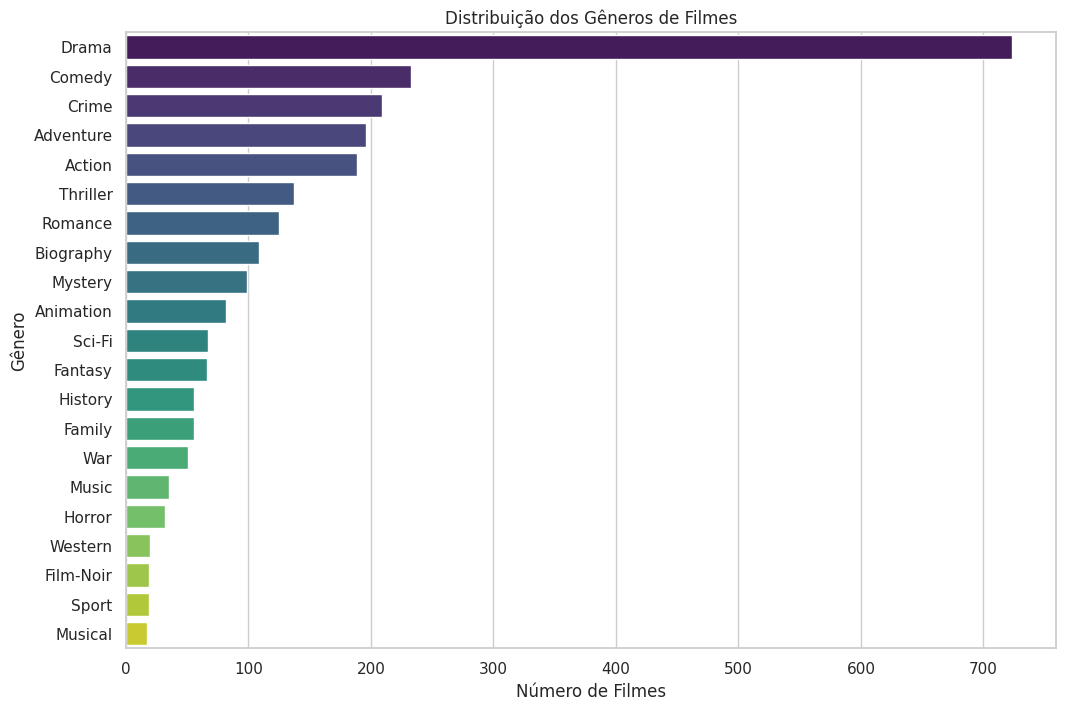

In [550]:
# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")

# Distribuição dos Gêneros
generos = df["Genre"].str.get_dummies(sep=", ")
contagem_generos = generos.sum().sort_values(ascending=False)

# Plotar a distribuição dos gêneros
plt.figure(figsize=(12, 8))
sns.barplot(
    x=contagem_generos.values,
    y=contagem_generos.index,
    hue=contagem_generos.index,
    palette="viridis",
    legend=False,
)
# Títutlo
plt.title("Distribuição dos Gêneros de Filmes")
plt.xlabel("Número de Filmes")
plt.ylabel("Gênero")
plt.show()

### Relação entre Gênero e Faturamento

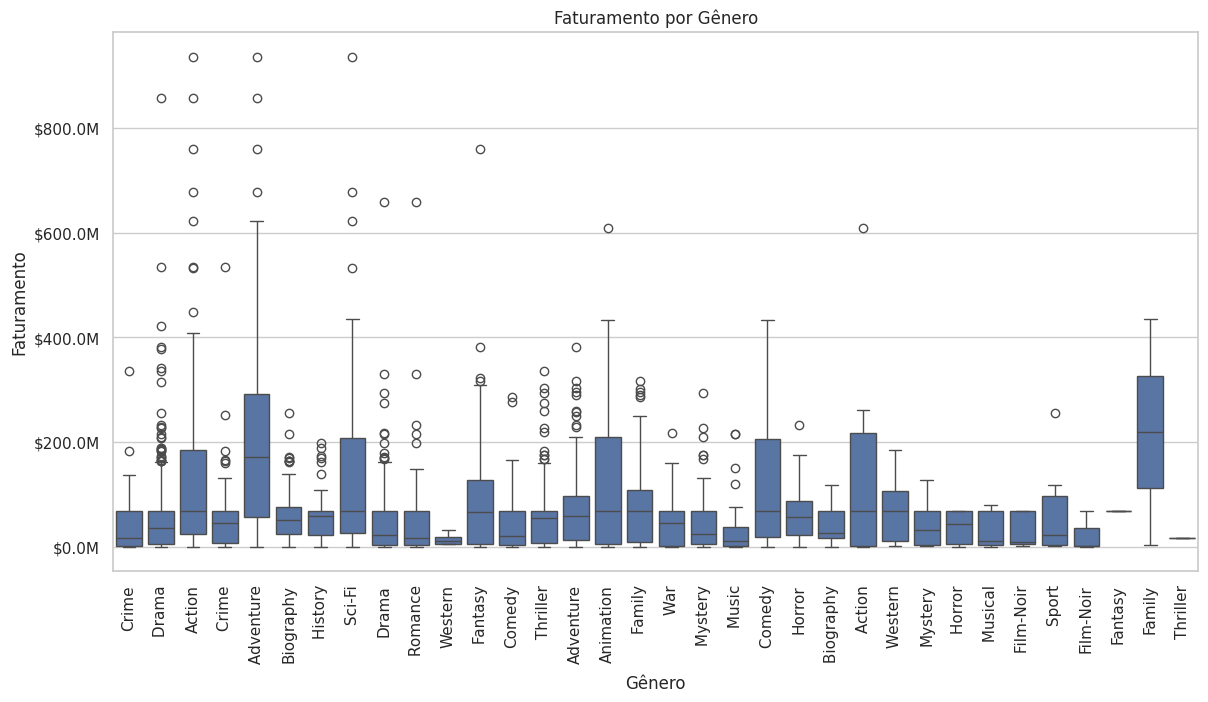

In [551]:
from matplotlib.ticker import FuncFormatter

# Explodir a coluna de gêneros para análise
data_exploded = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")

# Função para formatar os valores como dólares
def formatar_dolar(x, pos):
    return '${:.1f}M'.format(x*1e-6)

plt.figure(figsize=(14, 7))
sns.boxplot(data=data_exploded, x='Genre', y='Gross')
plt.title('Faturamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Faturamento')
plt.xticks(rotation=90)

# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Correlação entre Duração do Filme e Faturamento

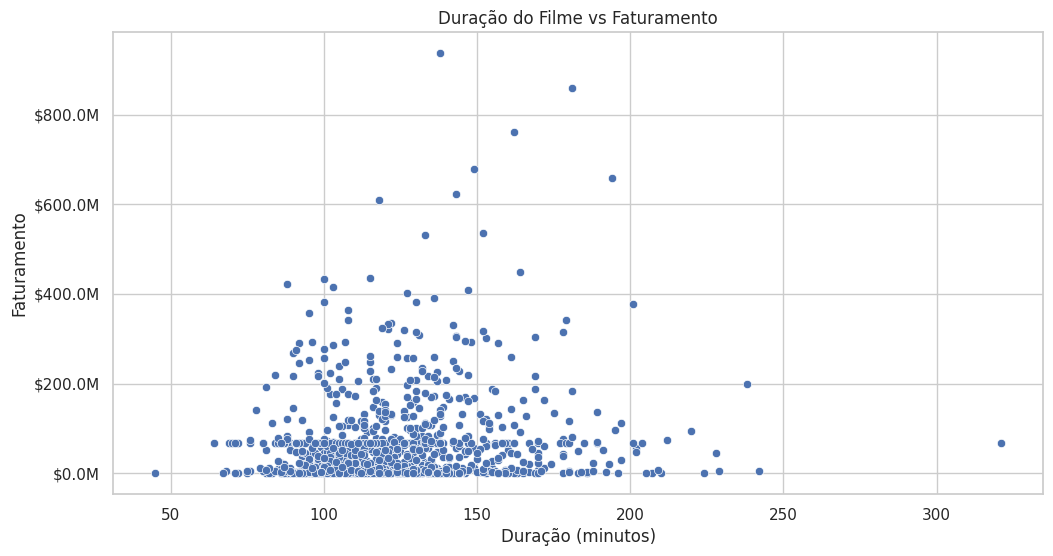

In [552]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Runtime', y='Gross')
plt.title('Duração do Filme vs Faturamento')
plt.xlabel('Duração (minutos)')
plt.ylabel('Faturamento')

# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

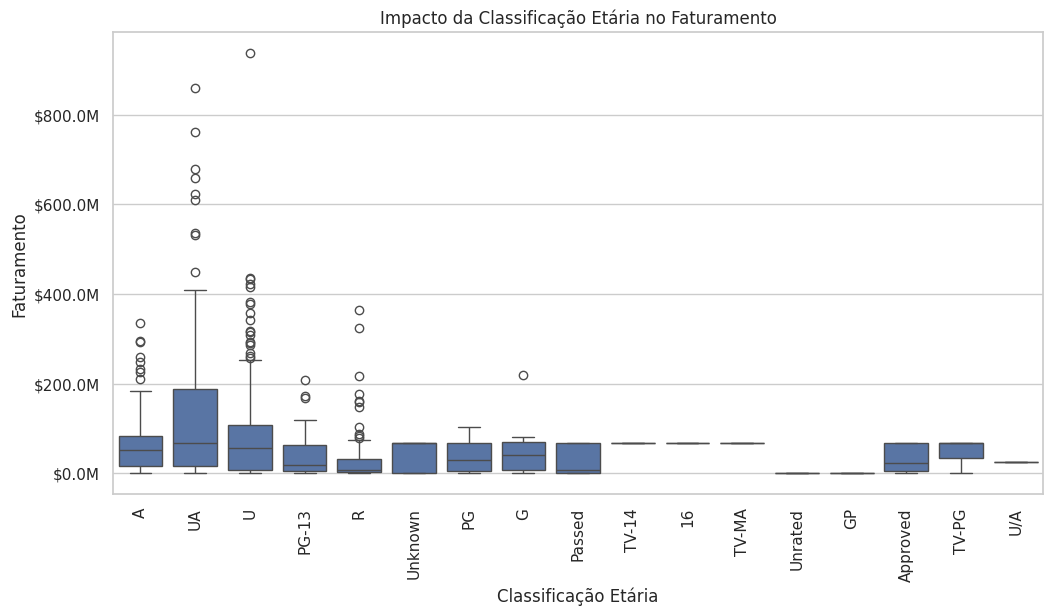

In [553]:
# Impacto da Classificação Etária no Faturamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Certificate', y='Gross')
plt.title('Impacto da Classificação Etária no Faturamento')
plt.xlabel('Classificação Etária')
plt.ylabel('Faturamento')
plt.xticks(rotation=90)
# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

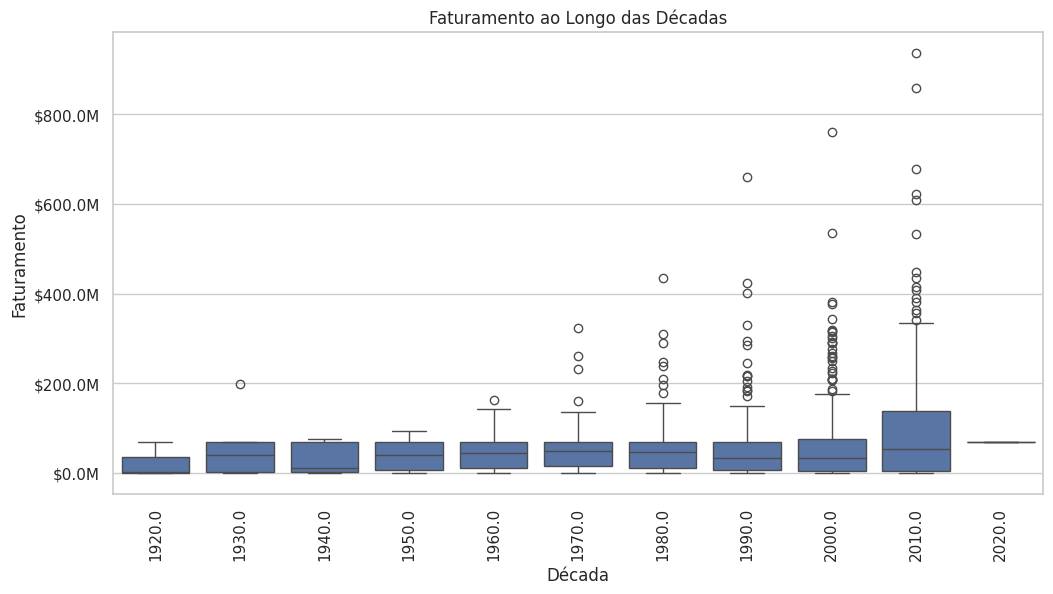

In [554]:
# Comparação de Faturamento ao Longo das Décadas
data['Decade'] = (df['Released_Year'] // 10) * 10
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Decade', y='Gross')
plt.title('Faturamento ao Longo das Décadas')
plt.xlabel('Década')
plt.ylabel('Faturamento')
plt.xticks(rotation=90)
# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


### Relação entre Ano de Lançamento e Classificação IMDB

<function matplotlib.pyplot.show(close=None, block=None)>

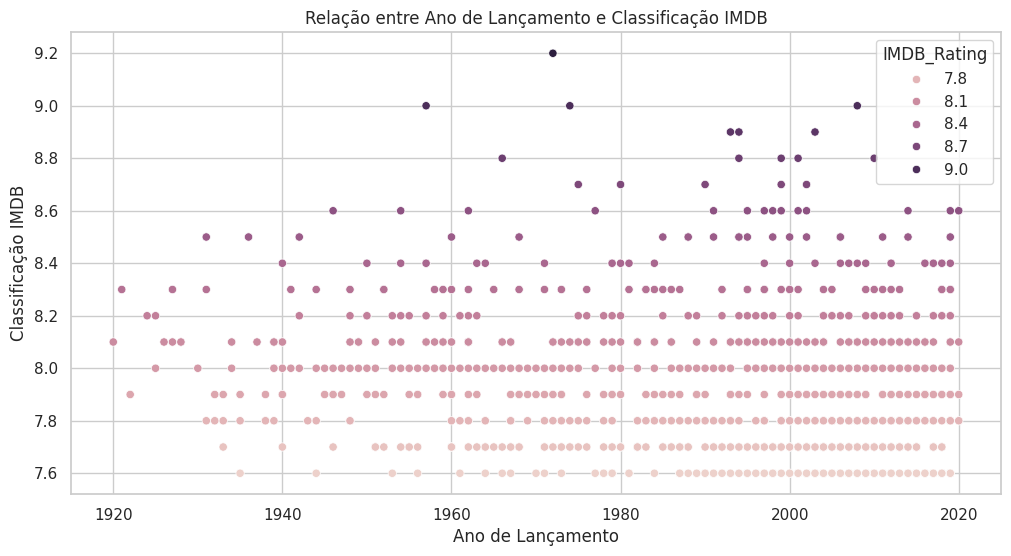

In [555]:
# Gráficos de dispersão entre Released Year vs IMDB Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Released_Year", y="IMDB_Rating", hue='IMDB_Rating')
plt.title("Relação entre Ano de Lançamento e Classificação IMDB")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Classificação IMDB")
plt.show

### Gêneros de Filmes e Classificação IMDB

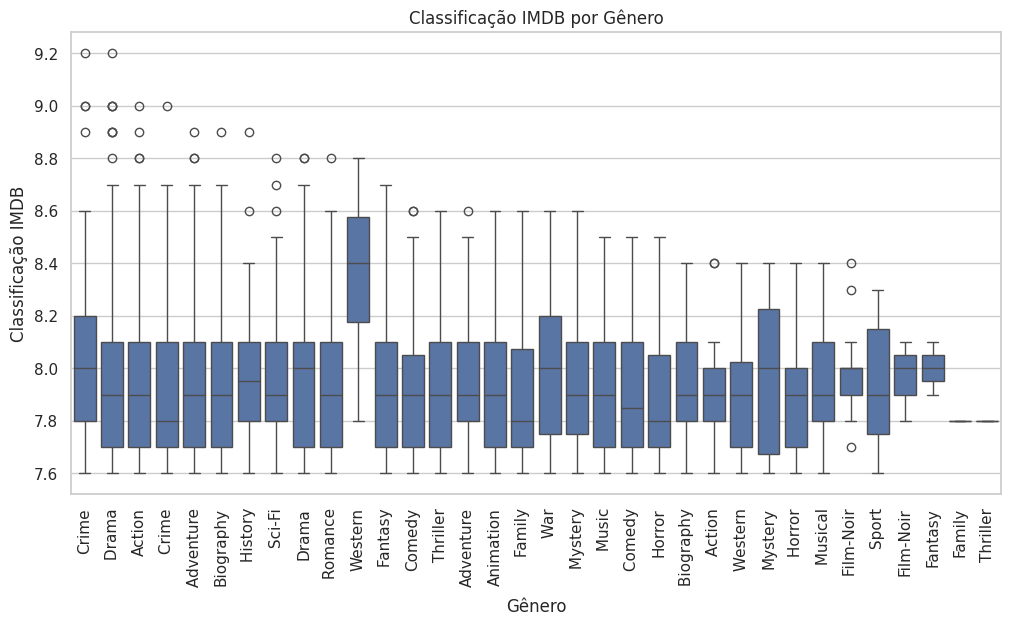

In [556]:
# Método Explode no Pandas
# Explodindo a coluna Genre para a visualização boxplot
data_exploded = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")

# Boxplot of Genre vs IMDB Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_exploded, x="Genre", y="IMDB_Rating")
plt.title("Classificação IMDB por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Classificação IMDB")
plt.xticks(rotation=90)
plt.show()

In [557]:
print("Certificados mais Repetitidos")
print("*" * 30)
df["Certificate"].value_counts().to_frame().style.highlight_max(color="red")

Certificados mais Repetitidos
******************************


,count
Certificate,
U,234
A,196
UA,175
R,146
Unknown,101
PG-13,43
PG,37
Passed,34
G,12


* **Ação**: Analisar os filmes com as melhores notas no IMDB e maiores números de votos.
* **Ferramentas**: `pandas`para filtrar e ordenar os dados.

In [558]:
# Mostrar os 10 melhores filmes avaliados por votos à cada ano
# melhores filmes avaliados por votos à cada ano
data = df.sort_values(by="Released_Year", ascending=False)
melhores_filmes_avaliados = pd.DataFrame(columns=data.columns)

for year in data["Released_Year"].unique():
    if year not in [2025, 2024, 2023]:
        df_year = data[data["Released_Year"] == year]
        if not df_year.empty:
            df_year_sorted = df_year.sort_values(by="No_of_Votes", ascending=False)
            melhores_filmes_avaliado = df_year_sorted.iloc[0]
            melhores_filmes_avaliados = pd.concat(
                [melhores_filmes_avaliados, melhores_filmes_avaliado.to_frame().T],
                ignore_index=True,
            )
melhores_filmes_avaliados.head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,Soul,2020.0,U,100.0,"Animation, Adventure, Comedy",8.1,"After landing the gig of a lifetime, a New Yor...",83.0,Pete Docter,Kemp Powers,Jamie Foxx,Tina Fey,Graham Norton,159171,68082574.104819
1,Joker,2019.0,A,122.0,"Crime, Drama, Thriller",8.5,"In Gotham City, mentally troubled comedian Art...",59.0,Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,335451311.0
2,Avengers: Infinity War,2018.0,UA,149.0,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
3,Logan,2017.0,A,137.0,"Action, Drama, Sci-Fi",8.1,"In a future where mutants are nearly extinct, ...",77.0,James Mangold,Hugh Jackman,Patrick Stewart,Dafne Keen,Boyd Holbrook,647884,226277068.0
4,Deadpool,2016.0,R,108.0,"Action, Adventure, Comedy",8.0,A wisecracking mercenary gets experimented on ...,65.0,Tim Miller,Ryan Reynolds,Morena Baccarin,T.J. Miller,Ed Skrein,902669,363070709.0
5,Mad Max: Fury Road,2015.0,UA,120.0,"Action, Adventure, Sci-Fi",8.1,"In a post-apocalyptic wasteland, a woman rebel...",90.0,George Miller,Tom Hardy,Charlize Theron,Nicholas Hoult,Zoë Kravitz,882316,154058340.0
6,Interstellar,2014.0,UA,169.0,"Adventure, Drama, Sci-Fi",8.6,A team of explorers travel through a wormhole ...,74.0,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,188020017.0
7,The Wolf of Wall Street,2013.0,A,180.0,"Biography, Crime, Drama",8.2,"Based on the true story of Jordan Belfort, fro...",75.0,Martin Scorsese,Leonardo DiCaprio,Jonah Hill,Margot Robbie,Matthew McConaughey,1187498,116900694.0
8,The Dark Knight Rises,2012.0,UA,164.0,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0
9,Harry Potter and the Deathly Hallows: Part 2,2011.0,UA,130.0,"Adventure, Drama, Fantasy",8.1,"Harry, Ron, and Hermione search for Voldemort'...",85.0,David Yates,Daniel Radcliffe,Emma Watson,Rupert Grint,Michael Gambon,764493,381011219.0


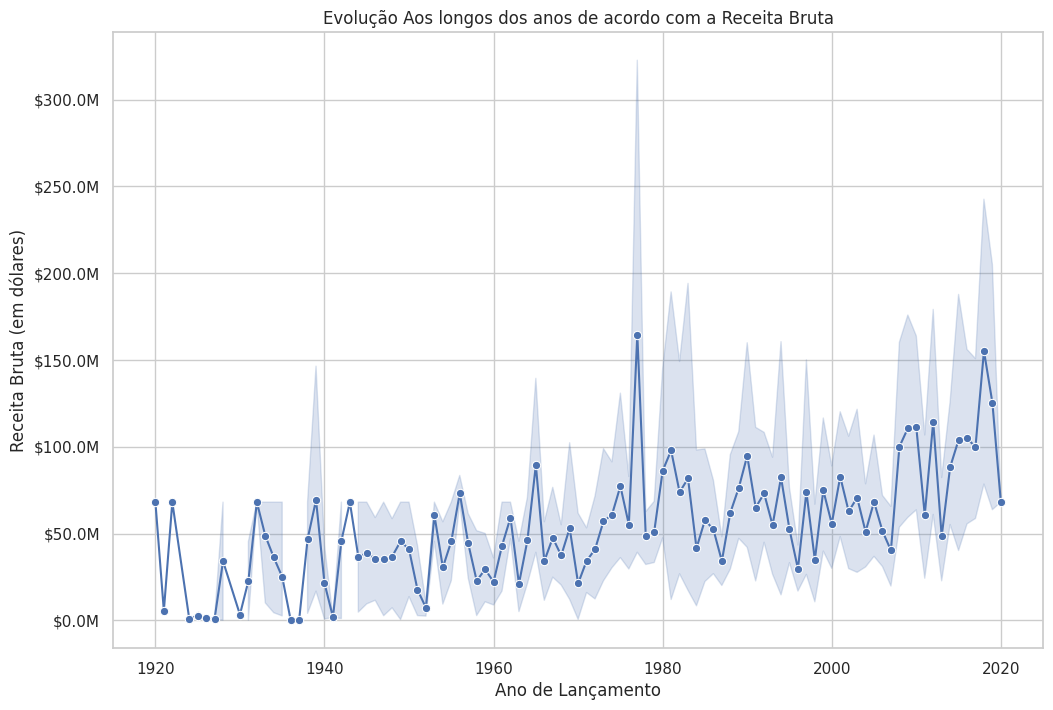

In [559]:
# Análise Temporal de Bilheteria ao longo dos anos
from matplotlib.ticker import FuncFormatter
# Função para formatar os valores como dólares
def formatar_dolar(x, pos):
    return '${:.1f}M'.format(x*1e-6)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="Released_Year", y="Gross", marker="o")
plt.title("Evolução Aos longos dos anos de acordo com a Receita Bruta")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Receita Bruta (em dólares)")

# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

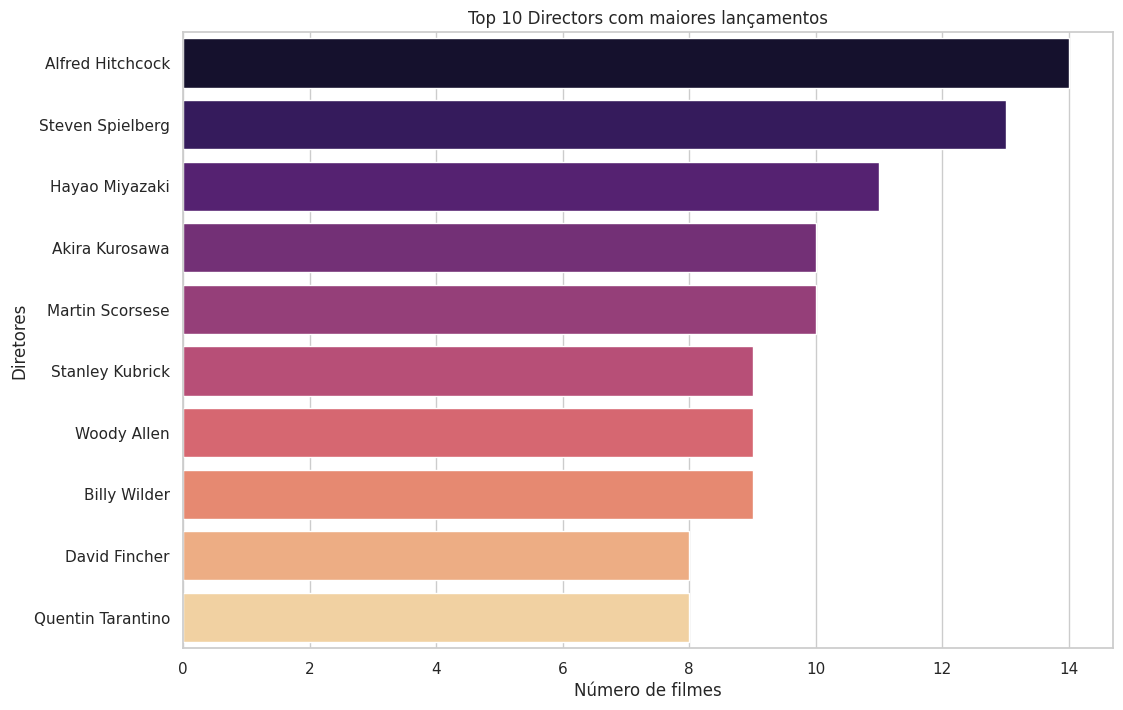

In [560]:
# Obtenha os diretores com os maiores números de lançamentos
contagem_diretor = df["Director"].value_counts().sort_values(ascending=False)
contagem_diretor_df = contagem_diretor.to_frame().reset_index()
contagem_diretor_df.columns = ["Director", "count"]

# Plotar os dados
plt.figure(figsize=(12, 8))
sns.barplot(
    x="count",
    y="Director",
    hue="Director",
    data=contagem_diretor_df.head(10),
    palette="magma",
)
plt.title("Top 10 Directors com maiores lançamentos")
plt.xlabel("Número de filmes")
plt.ylabel("Diretores")
plt.show()

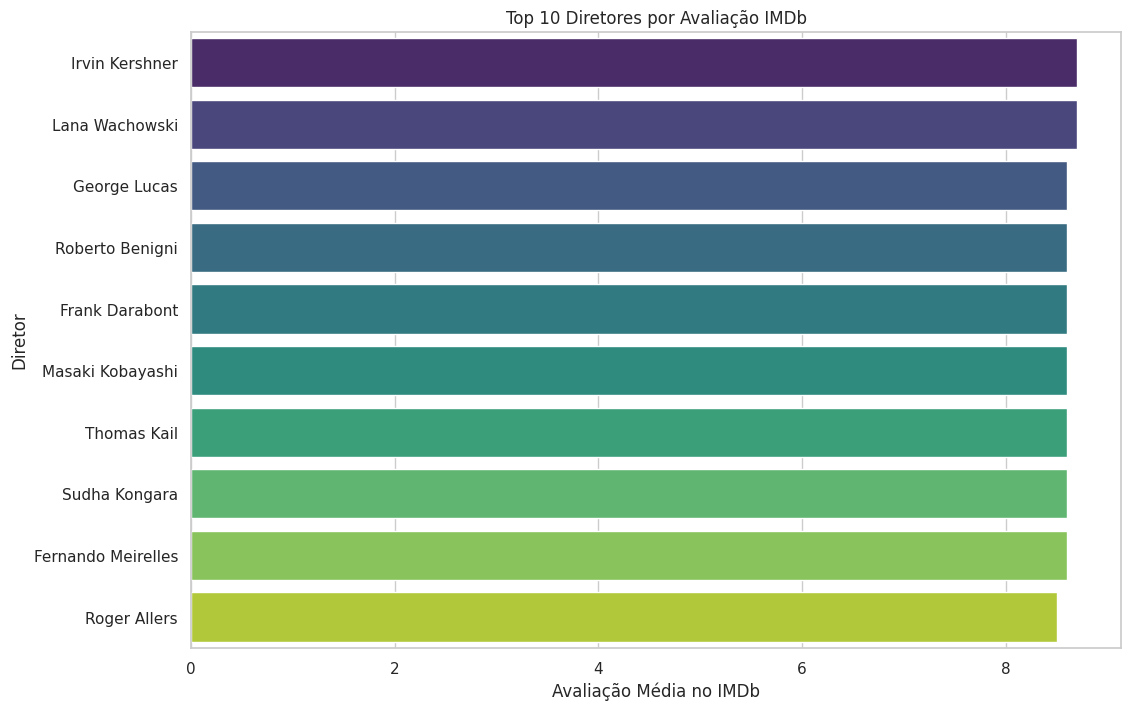

In [561]:
# Análise de Diretores e Atores
# Top 10 Diretores por Avaliação IMDb
top_diretores = (
    df.groupby("Director")["IMDB_Rating"].mean().sort_values(ascending=False).head(10)
)

# Plotar os top 10 diretores
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_diretores.values,
    y=top_diretores.index,
    hue=top_diretores.index,
    palette="viridis",
)
plt.title("Top 10 Diretores por Avaliação IMDb")
plt.xlabel("Avaliação Média no IMDb")
plt.ylabel("Diretor")
plt.show()

# 4. Modelagem Preditiva
* Modelo Utilizado: `Regressão Linear` para prever a nota do IMDB.
* Tipo de Problema: Regressão.
* Avaliação do Modelo: `Mean Squared Error (MSE)` e `R-squared (R²)`.

### Palavras-chave na Coluna Overview

In [562]:
# Pré-processamento de texto
df["Overview"] = df["Overview"].str.lower()

# Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["Overview"])

# Transformar  acoluna Genre para multi-label binária
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df["Genre"].str.split(","))

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinar o modelo
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Previsão e Avaliação
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

ValueError: y should be a 1d array, got an array of shape (799, 34) instead.

# 5.Previsão da Nota do IMDb para um Filme Específico
* **Ação**: Utilizar o modelo treinado para prever a nota do IMDB de um filme com as características fornecidas.
* **Ferramentas**: `pandas` para preparar os dados de entrada, `sklearn` para aplicar o modelo treinado.

In [ ]:
# Preparar os dados do dataset original e preparar os features
features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
X = df[features]
y = df['IMDB_Rating']

# Lidar com dados faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir o dataset para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever e avaliar para testar a qualidade do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Características do filme
filme = {
    "Series_Title": "The Shawshank Redemption",
    "Released_Year": 1994,
    "Certificate": "A",
    "Runtime": 142,
    "Genre": "Drama",
    "Meta_score": 80.0,
    "Director": "Frank Darabont",
    "Star1": "Tim Robbins",
    "Star2": "Morgan Freeman",
    "Star3": "Bob Gunton",
    "Star4": "William Sadler",
    "No_of_Votes": 2343110,
    "Gross": 28341469,
}

# Selecionar as mesmas features utilizadas no modelo
filme_features = [[
    filme['Released_Year'],
    filme['Runtime'],
    filme['Meta_score'],
    filme['No_of_Votes'],
    filme['Gross']
]]

# Utilizar o mesmo imputador para garantir consistência
filme_imputador = imputer.transform(filme_features)

# Fazer a previsão com o modelo treinado
filme_rating = model.predict(filme_imputador)
arredondar_rating = round(filme_rating[0], 2)
print(f'Nota Previsão do IMDB: {arredondar_rating}')

Mean Squared Error: 0.04872161081094926
R-squared: 0.25779034167708803
Nota Previsão do IMDB: 9.17


In [ ]:
import joblib
# Salvar o modelo em formato .pkl
joblib.dump(model, 'modelo_imdb.pkl')

['modelo_imdb.pkl']